## Dice game question

Question: "Let's play a game. You can roll a dice three times. At every roll before the end, you can choose to stop and take the face value (in dollars) or roll again. How much should you be willing to pay to play this game?"

Solution:

Imagine you're at roll 3. Every outcome is equally likely. In general, we should be willing to pay the "average payoff" of the game.

In [1]:
expected_payoffs_roll3 = [1, 2, 3, 4, 5, 6]

# very quick average function that we need! This can be interpreted as "expected value"
def average(l):
    return sum(l)/len(l)

average(expected_payoffs_roll3)

3.5

The average of all the payoffs is 3.5

Now imagine you're at roll 2. You can have the same outcomes. 1, 2, 3, 4, 5, 6. However, suppose you roll a 1 (or 2, or 3.) . You know on average you can get 3.5 on the next roll, so you'll  roll again. Conversely, if you roll a 4, 5, or 6, you'll stop -- your expected value from continuing to roll is lower than what you have now.

In [2]:
# Programming this in with a list comprehension, which is a piece of Python syntax.
avg_roll3 = average(expected_payoffs_roll3)
expected_payoffs_roll2 = [max(avg_roll3, payoff) for payoff in expected_payoffs_roll3]
expected_payoffs_roll2

[3.5, 3.5, 3.5, 4, 5, 6]

The above is after roll 2, but the same logic applies after roll 1. The average of the outcomes after roll 2 is:

In [3]:
avg_roll2 = average(expected_payoffs_roll2)
avg_roll2

4.25

And we can roll it back with the same logic.

In [4]:
expected_payoffs_roll1 = [max(avg_roll2, payoff) for payoff in expected_payoffs_roll2]
expected_payoffs_roll1

[4.25, 4.25, 4.25, 4.25, 5, 6]

And so we should be willing to pay the average of these.

In [5]:
avg_roll1 = average(expected_payoffs_roll1)
avg_roll1

4.666666666666667

This is the answer for the question *as given*. If we can roll the dice three times, then we should be willing to pay $4\frac{2}{3}$ to play this game.


There's nothing special about the number 3. We can "roll this back" as many times as we want. The answer will alwyas be between 3.5 and 6 no matter how big $n_{\text{rolls}}$ gets

In [6]:
n_rolls = 123
# n_rolls > 0

outcomes = [1, 2, 3, 4, 5, 6]
for i in range(n_rolls - 1):
    outcomes = [max(average(outcomes), outcome) for outcome in outcomes]
average(outcomes)

5.999999999605254

In [7]:
# Graph of prices:
prices = []
count = []
outcomes = [1, 2, 3, 4, 5, 6]

for n_rolls in range(1, 101):
    prices.append(average(outcomes))
    count.append(n_rolls)
    outcomes = [max(average(outcomes), outcome) for outcome in outcomes]


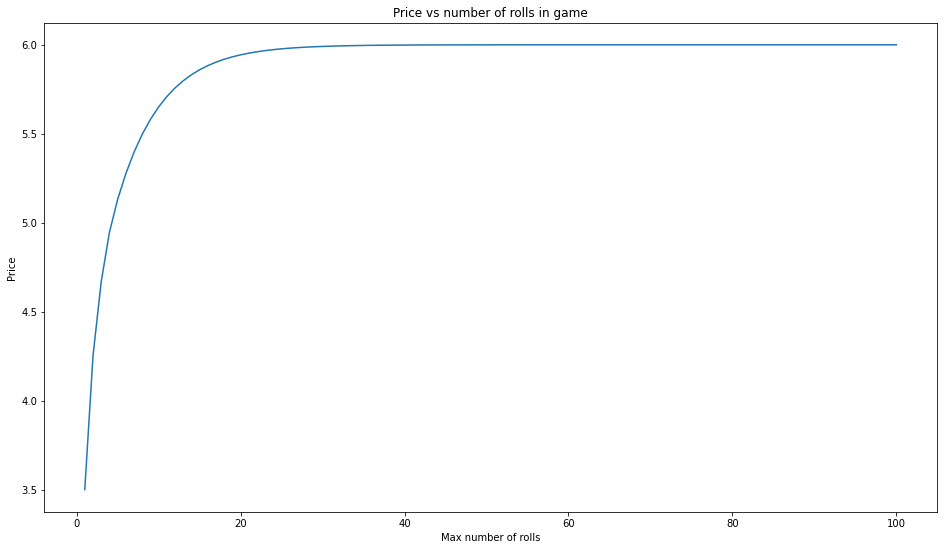

In [8]:
#graphing packages
import matplotlib.pyplot as plt
import seaborn as sns 
fig, axs = plt.subplots(1, figsize=(16, 9))
sns.lineplot(x=count, y=prices)
axs.set(xlabel='Max number of rolls', ylabel='Price', title='Price vs number of rolls in game')
None # adding "None" at the end suppresses some output we don't want to see